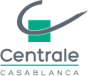
# Coding week : 27-31 March 2023

**Project 3: Movie recommender systems using Regularized movie and user effect model**



```
Objective
```
  The project’s goal is to train a machine learning algorithm using movieLens data for movie recommendation by implementing a regularized movie and user effect model.



```
Process
```
The purpose of a recommender system is to search for content that a user may be interested in. These systems are extensively used by companies to advertise for movies, books, music tracks, restaurants and many applications to users who had shown similar taste in the items they trade in. In particular, a movie recommender system in general is a system that is used to predict the chance that users who had watched a particular movie will likely be interested to watch a different movie depending on the choices of movies they make and their choices matches other users.




```
Exploratory Data Analysis (EDA) and Data visualization
```



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
unames = ['user_id', 'age', 'genre', 'occupation', 'zip'] # nom des colonnes de la table Users
users = pd.read_table('/content/sample_data/u.user', sep=None, names=unames, engine='python')

users.head()

<ipython-input-4-34c345cba143>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  users = pd.read_table('/content/sample_data/u.user', sep=None, names=unames)


,user_id,age,genre,occupation,zip
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_table('/content/sample_data/u.data', sep=None, names=rnames, engine='python')
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [ ]:
mnames = ['movie_id', 'title', 'release_date', 'video_release_date','IMDb URL','Unknown', 'Action', 'Adventure',
          'Animation', 'Childrens','Comedy','Crime' , 'Documentary', 'Drama', 'Fantasy','Film_Noir',
          'Horror', 'Musical', 'Mystery', 'Romance', 'Sci_Fi','Thriller', 'War', 'Western']
movies = pd.read_table('/content/sample_data/u.item', sep = '|', header=None, names=mnames, engine='python',  encoding = 'iso-8859-1')

# Définir une fonction qui remplace les valeurs binaires par les noms de genre correspondants
def get_genre_names(row):
    genre_names = []
    for i, col_value in enumerate(row.iloc[5:]):
        if col_value == 1:
            genre_names.append(mnames[i+5])
    return '|'.join(genre_names)

# Lire le fichier avec pandas en utilisant l'encodage 'iso-8859-1'
movies = pd.read_table('/content/sample_data/u.item', sep = '|', header=None, names=mnames,  encoding = 'iso-8859-1')

# Appliquer la fonction `get_genre_names` à chaque ligne pour remplacer les valeurs binaires par les noms de genre
movies['genres'] = movies.apply(get_genre_names, axis=1)

# Supprimer les colonnes inutiles
movies.drop(mnames[5:25], axis=1, inplace=True)
movies.drop(mnames[3:5], axis=1, inplace=True)
# Afficher les 10 premières lignes du dataframe
movies.head(10)



,movie_id,title,release_date,genres
0,1,Toy Story (1995),01-Jan-1995,Animation|Childrens|Comedy
1,2,GoldenEye (1995),01-Jan-1995,Action|Adventure|Thriller
2,3,Four Rooms (1995),01-Jan-1995,Thriller
3,4,Get Shorty (1995),01-Jan-1995,Action|Comedy|Drama
4,5,Copycat (1995),01-Jan-1995,Crime|Drama|Thriller
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,Drama
6,7,Twelve Monkeys (1995),01-Jan-1995,Drama|Sci_Fi
7,8,Babe (1995),01-Jan-1995,Childrens|Comedy|Drama
8,9,Dead Man Walking (1995),01-Jan-1995,Drama
9,10,Richard III (1995),22-Jan-1996,Drama|War


In [ ]:
data = pd.merge(pd.merge(ratings, users), movies)
data.head(10000)

,user_id,movie_id,rating,timestamp,age,genre,occupation,zip,title,release_date,genres
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,Comedy
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,Comedy
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,Comedy
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,Comedy
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,Comedy
...,...,...,...,...,...,...,...,...,...,...,...
9995,889,554,4,880181976,24,M,technician,78704,Waterworld (1995),01-Jan-1995,Action|Adventure
9996,896,554,2,887161199,28,M,writer,91505,Waterworld (1995),01-Jan-1995,Action|Adventure
9997,934,554,4,891194462,61,M,engineer,22902,Waterworld (1995),01-Jan-1995,Action|Adventure
9998,186,44,5,879023529,39,F,executive,00000,Dolores Claiborne (1994),01-Jan-1994,Drama|Thriller


In [ ]:
#Combien de films ont une note supérieure à 4.5 ?
np.sum(data.rating > 4.5)

21201

In [ ]:
#Existe-t-il une différence entre les hommes et les femmes?
np.sum(data.rating[data.genre == 'M'] > 4.5)

15226

In [ ]:
np.sum(data.rating[data.genre == 'F'] > 4.5)

5975

In [ ]:
#Attention il serait mieux de regarder les proportions pour avoir une réponse plus  pertinente:
np.sum(data.rating[data.genre == 'M'] > 4.5) * 1.0 / np.sum(data.rating[data.genre == 'M']<6)

0.2050363587395637

In [ ]:
np.sum(data.rating[data.genre == 'F'] > 4.5) * 1.0 / np.sum(data.rating[data.genre == 'F']<6)

0.23212898212898214

In [ ]:
#Combien de films ont une note médiane au dessus de 4,5 parmis les hommes de plus de 30 ans? parmis les femmes de plus de 30 ans?
np.sum(data[(data.genre == 'M') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

62

In [ ]:
np.sum(data[(data.genre == 'F') & (data.age >= 30)].groupby('movie_id', axis=0)['rating'].median() >= 4.5)

89

In [ ]:
#Quelles sont les films les plus populaires?
data.groupby('movie_id', axis=0)['rating'].mean().nlargest(15)

movie_id
814     5.000
1122    5.000
1189    5.000
1201    5.000
1293    5.000
1467    5.000
1500    5.000
1536    5.000
1599    5.000
1653    5.000
1449    4.625
119     4.500
1398    4.500
1594    4.500
1642    4.500
Name: rating, dtype: float64

In [ ]:
data[data.movie_id == 814]

,user_id,movie_id,rating,timestamp,age,genre,occupation,zip,title,release_date,genres
98673,13,814,5,886302261,47,M,educator,29206,"Great Day in Harlem, A (1994)",01-Jan-1994,Documentary


In [ ]:
#Il y a un effet taille certain... ici seule une personne a noté le meilleur film. Maintenant regardons ceux qui
#sont "suffisament" populaires:
data.groupby('movie_id', axis=0)['rating'].count().head()

movie_id
1    452
2    131
3     90
4    209
5     86
Name: rating, dtype: int64

In [ ]:
# dataframe contenant les films les plus populaire ainsi que la moyenne des notes qui les sont attribuées
data2 = pd.concat([data.groupby('movie_id', axis=0)['rating'].mean(),
                   data.groupby('movie_id', axis=0)['rating'].count()], axis=1)
data2.columns = ['mean_rating', 'n_rating']
data2.head()

,mean_rating,n_rating
movie_id,,
1,3.878319,452
2,3.206107,131
3,3.033333,90
4,3.550239,209
5,3.302326,86


<Axes: >

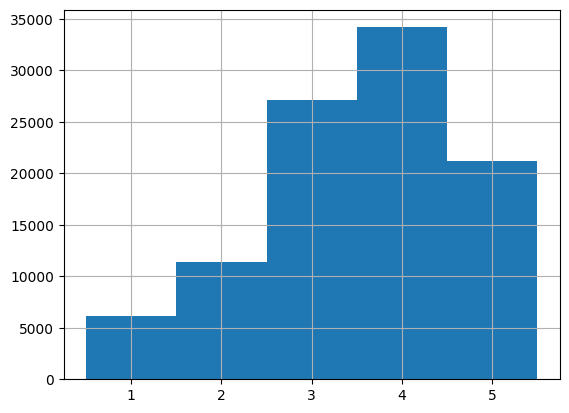

In [ ]:
data.rating.hist(bins=5, align='left', range=[1, 6]) #l'histogramme de toutes les notes

<Axes: >

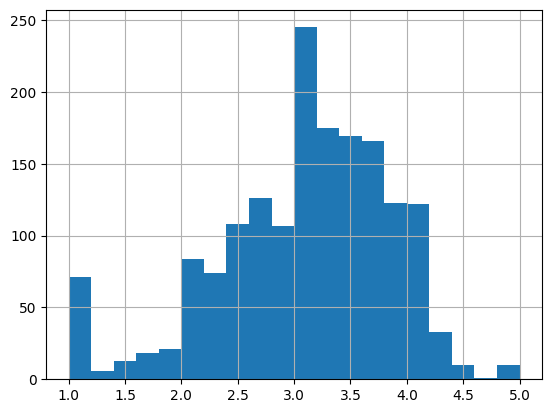

In [ ]:
#Afficher l'histogramme des notes moyennes des films.
data.groupby('movie_id', axis=0)['rating'].mean().hist(bins=20)

<Axes: >

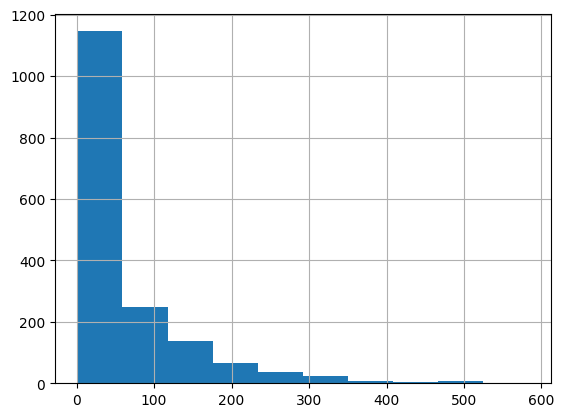

In [ ]:
#Affichage l'histogramme du nombre de notes reçues par chaque film
data.groupby('movie_id', axis=0)['rating'].count().hist(bins=10)

<Axes: ylabel='Frequency'>

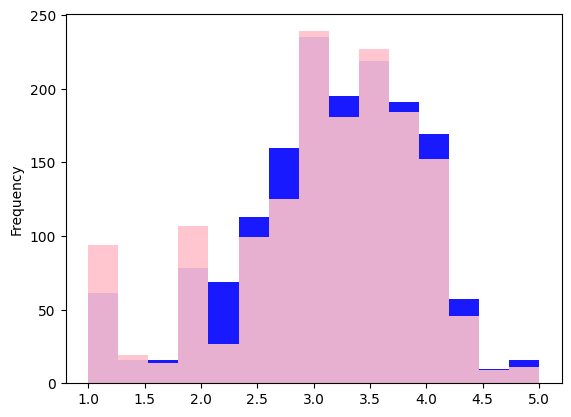

In [ ]:
#La distribution des notes dépent-elle du sexe?
data[data.genre == 'M'].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', alpha=0.9, color='b', bins=15)
data[data.genre == 'F'].groupby('movie_id', axis=0)['rating'].mean().plot(kind='hist', alpha=0.9, color='pink', bins=15)

#En moyenne les hommes notes mieux que les femmes

In [ ]:
#Afficher l'histogramme des notes des films qui ont été notés plus de seuil_pop = 30 fois.
seuil_pop = 50
map_id_to_count = data.groupby('movie_id')['rating'].count().to_dict()
data['movie_count'] = data['movie_id'].map(map_id_to_count)   # rajoute une variable comptant le nombre de votes par film

<Axes: ylabel='Density'>

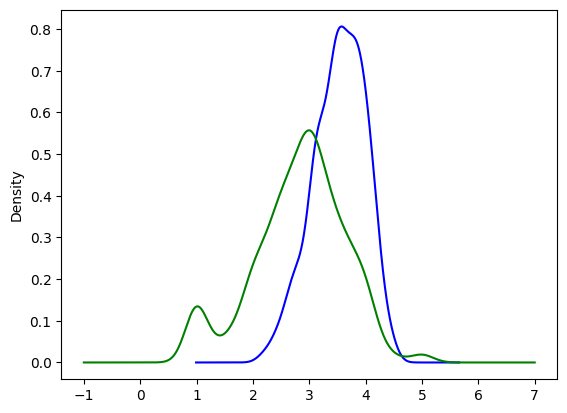

In [ ]:
# changer kde par hist pour retrouver un histogramme et non une estimation de la densite
data[data.movie_count >= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='kde', color='b')
data[data.movie_count <= seuil_pop].groupby('movie_id', axis=0)['rating'].mean().plot(kind='kde', color='g')

In [ ]:
#Afficher un "scatter plot" des notes moyennes pour les hommes contre les notes des femmes pour chaque film
#(notés plus de seuil_pop = 100 fois).
seuil_pop = 100
data_popular = data[data.movie_count >= seuil_pop]
mean_ratings = data_popular.pivot_table(values='rating', index='title',columns='genre', aggfunc='mean')

In [ ]:
mean_ratings.sort_values('F', ascending=False).head(10) #top 10 féminin

genre,F,M
title,,
Schindler's List (1993),4.632911,4.406393
"Close Shave, A (1995)",4.631579,4.462366
"Shawshank Redemption, The (1994)",4.562500,4.410959
"Wrong Trousers, The (1993)",4.444444,4.472527
Sling Blade (1996),4.411765,4.127451
Secrets & Lies (1996),4.407407,4.194444
Casablanca (1942),4.400000,4.473404
Much Ado About Nothing (1993),4.381818,3.917355
Good Will Hunting (1997),4.355932,4.223022


In [ ]:
mean_ratings.sort_values('M', ascending=False).head(10) #top 10 masculin

genre,F,M
title,,
Casablanca (1942),4.400000,4.473404
"Wrong Trousers, The (1993)",4.444444,4.472527
"Close Shave, A (1995)",4.631579,4.462366
"Shawshank Redemption, The (1994)",4.562500,4.410959
Schindler's List (1993),4.632911,4.406393
Rear Window (1954),4.351852,4.400000
"Usual Suspects, The (1995)",4.333333,4.399061
Star Wars (1977),4.245033,4.398148
12 Angry Men (1957),4.269231,4.363636


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='F', ylabel='M'>

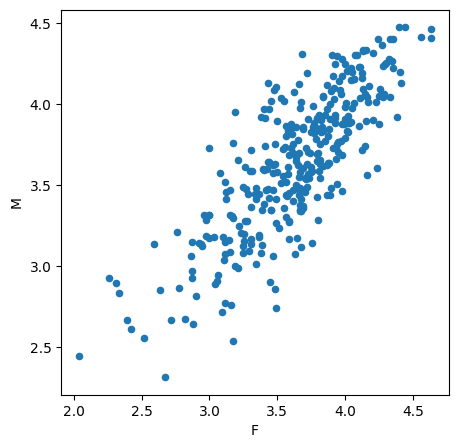

In [ ]:
mean_ratings.plot(x='F', y='M', kind='scatter', figsize=(5,5))

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='F', ylabel='M'>

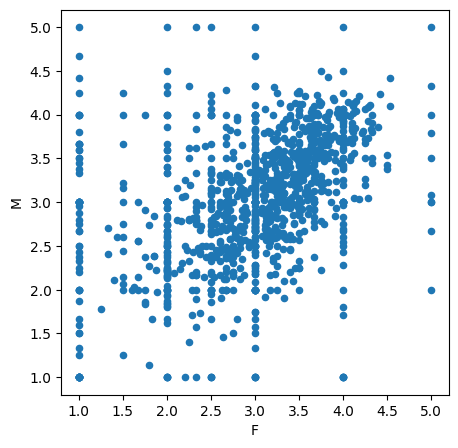

In [ ]:
#Afficher un "scatter plot" des notes moyennes des hommes vs les femmes pour chaque film noté moins de seuil_pop = 100 fois.
data_not_popular = data[data.movie_count <= seuil_pop]
mean_ratings_not_popular = data_not_popular.pivot_table(values='rating', index='title',columns='genre', aggfunc='mean')
mean_ratings_not_popular.plot(x='F', y='M', kind='scatter', figsize=(5,5))



```
Model building and Evaluation
```



In [ ]:
import pandas as pd
import numpy as np

#Fonction calculant le rmse à l'aide de tableau des notes prédites et réelles
def rmse(ratings, prediction):
  s = 0
  for i in range(20000):
    s += (ratings[i] - prediction[i])**2
  return np.sqrt(s/20000)

#Fonction calculant les rmses pour les differents modèles, en fonctions des differentes datasets
#Le paramètre n represente l'indice de la partition choisie(u1,...,u5)
def fonction(n):
  rmse_1 = []
  #Creation de la matrice remplie de zéros
  R = np.zeros((943,1682))

  #Création de la table ratings_base contenant les données d'entrainenent de la n_ième partition choisie
  nnoms = ['users', 'movies', 'ratings', 'times+']
  ratings_base = pd.read_table('/content/sample_data/u'+str(n)+'.base',sep = '\t', names = nnoms)

  #Remplissage de la matrice
  cord_base = [] #Tableau devant contenir un tuple (userId, moviesId, ratingsId) pour les données d'entrainement
  for i in range(80000):
    cord_base.append((ratings_base['users'][i],ratings_base['movies'][i], ratings_base['ratings'][i]))
    R[cord_base[i][0]-1][cord_base[i][1]-1] = cord_base[i][2]#Remplissage de la matrice avec les notes de la n_ième partition choisie

  #Création de la table ratings_test contenant les données du test de la n_ième partition choisie
  ratings_test = pd.read_table('/content/sample_data/u'+str(n)+'.test',sep = '\t', names = nnoms)
  cord_test = [] #Tableau devant contenir un tuple (userId, moviesId, ratingsId) pour les données de test
  for i in range(20000):
    cord_test.append((ratings_test['users'][i],ratings_test['movies'][i], ratings_test['ratings'][i]))


  ##Modèle 1: Simple overall average model
  pred1 = []#Tableau des notes prédites
  for i in range(20000):
    pred1.append(ratings_base['ratings'].mean())
  RMSE1 = rmse(ratings_test['ratings'], pred1)

  ##Modèle 2: Movie effect multi-variate model
  #Remplissage du tableau devant contenir la moyenne des notes  attribuées à chaque film par les utilisateurs
  t_i = []
  for i in range(1682):
    a = sum(R[:,i])
    compt=0
    for j in range(943):
      if R[j][i]!= 0 :
        compt += 1
    if compt != 0:
      t_i.append(a/compt)
    else:
      t_i.append(0)

  #Remplissage du tableau devant contenir les notes prédites pour les films manquants
  pred2 = []
  for i in range(20000):
    pred2.append(t_i[cord_test[i][1]-1]) #cord_test[i][1] correspond aux identifiants des films manquants

  #Remplissage du tableau devant contenir les biais associés à chaque film
  b_i = []
  for i in range(20000):
    b_i.append(pred2[i] - ratings_base['ratings'].mean())
  RMSE2 = rmse(ratings_test['ratings'], pred2)

  ##Modèle 3: Movie and user effect multi-variate model
  t_u=[] #tableau devant contenir la moyenne des notes  attribuées par chaque utilisateur pour l'ensemble des films visionnés par celui-ci
  t_films_u =[] #tableau devant contenir la moyenne des biais des films regardés par chaque utilisateur
  for i in range(943):
    c=sum(R[i])
    tab = [] #tableau devant contenir les biais des films regardés par l'utilisateur u
    for j in range(1682):
      if R[i][j]!= 0 :
        tab.append(b_i[j])
    t_films_u.append(np.mean(tab))
    if len(tab)!=0:
      t_u.append(c/len(tab))
    else:
      t_u.append(0)

  b_u = []  #tableau devant contenir les biais associés à chaque utilisateur
  pred_u = [] #tableau devant contenir les notes prédites compte tenu du biais utilisateur
  pred3 = []  #tableau devant contenir les notes prédites compte-tenu des biais utilisateur et film
  for i in range(20000):
    pred_u.append(t_u[cord_test[i][0]-1])
    b_u.append(t_u[cord_test[i][0]-1] - t_films_u[cord_test[i][0]-1] - ratings_base['ratings'].mean())
    pred3.append(ratings_base['ratings'].mean() + b_i[i]+b_u[i])
  RMSE3 = rmse(ratings_test['ratings'], pred3)


  ##Modele 4: Regularized movie and user effect model
  l = 6.49 #Valeur de l pour la quelle le rmse4 est minimum
  tab_rmse=[]
  t_u_regularized=[]  #tableau contenant la moyenne pénalisée par le paramètre l de régulation donnée par chaque utilisateur
  t_films_u_regularized =[] #tableau devant contenir la moyenne pénalisée par le paramètre l de régulation des biais des films regardés par chaque utilisateur
  coef=[]
  for i in range(943):
    c=sum(R[i])
    compt=0
    tab_regularized = []
    for j in range(1682):
      if R[i][j]!= 0 :
        compt+=1
        tab_regularized.append(b_i[j])
    t_films_u_regularized.append(sum(tab_regularized)/(compt+l))
    coef.append(compt/(compt+l))
    if compt!=0:
      t_u_regularized.append(c/(compt+l))
    else:
      t_u_regularized.append(0)

  #Remplissage du tableau devant contenir les biais pénalisée par le paramètre l de régulation associés à chaque film
  b_i_regularized = []
  for i in range(1682):
    b = 0
    a = sum(R[:,i])
    compt=0
    for j in range(943):
      if R[j][i]!= 0 :
        compt += 1
    b = a-compt*(ratings_base["ratings"].mean())
    if compt != 0:
      b_i_regularized.append(b/(compt+l))
    else:
      b_i_regularized.append(0)

  b_u_regularized = []
  pred_u_regularized = []
  pred3_regularized = []
  for i in range(20000):
    pred_u_regularized.append(t_u_regularized[cord_test[i][0]-1])
    b_u_regularized.append(pred_u_regularized[i] -t_films_u_regularized[cord_test[i][0]-1]-coef[cord_test[i][0]-1] * ratings_base['ratings'].mean())
    pred3_regularized.append(ratings_base['ratings'].mean() + b_i_regularized[cord_test[i][1]-1] + b_u_regularized[i])
  tab_rmse.append(rmse(ratings_test['ratings'], pred3_regularized))
  RMSE4 = min(tab_rmse)

  #Formatage des résultats
  data = {'Modéles':  ['Simple overall average model', 'Movie effect multi-variate model','Movie and user effect multi-variate model', 'Regularized movie and user effect model'],
        'RMSE': [RMSE1, RMSE2, RMSE3, RMSE4]}

  return pd.DataFrame(data)

In [ ]:
if __name__ == "__main__":
  m = np.zeros((5,4)) #Matrice qui servira pour le calcul de la moyenne des rmse pour chaque modèle

  #Aplication de la fonction à chaque partition
  for i in range(1,6):
    m[i-1] = fonction(i)['RMSE']
    print("Résultat base de donnée u"+str(i),"\n",fonction(i),"\n")

  #Calcul de la moyenne des rmse pour chaque modèle
  for i in range(1,5):
    print("RMSE moyen du modèle "+str(i)+" :", m[:,i-1].mean(),"\n")

Résultat base de donnée u1 
                                      Modéles      RMSE
0               Simple overall average model  1.153676
1           Movie effect multi-variate model  1.036062
2  Movie and user effect multi-variate model  0.991449
3    Regularized movie and user effect model  0.973771 

Résultat base de donnée u2 
                                      Modéles      RMSE
0               Simple overall average model  1.130664
1           Movie effect multi-variate model  1.031429
2  Movie and user effect multi-variate model  0.978898
3    Regularized movie and user effect model  0.961109 

Résultat base de donnée u3 
                                      Modéles      RMSE
0               Simple overall average model  1.111582
1           Movie effect multi-variate model  1.024231
2  Movie and user effect multi-variate model  0.977835
3    Regularized movie and user effect model  0.955252 

Résultat base de donnée u4 
                                      Modéles      RMS

In light of these results, it appears that Model 1, which has the largest RMSE, is the most coarse model. Model 2 gains slightly more precision by taking into account the effect of the movies. Precision becomes even more optimal by combining this effect with that of the users, as seen in the results of Model 3, which is more refined than the previous ones.
Finally, we have a clear illustration of the extremely important effect of regularization, which, when applied to the previous model, emerges as the most performant of them all.



```
Conclusion and perspectives
```
From the work carried out, we conclude that a recommendation system aiming for optimal precision must take into account at least the impact of the movies and the users who have assigned ratings. Such a model remains limited but can be greatly improved with the help of regularization in order to achieve the pinnacle of precision.

The perspectives that could be derived from such work are very interesting. We can envisage the improvement of current recommendation systems by identifying the shortcomings of these systems, including the failure to take into account the influence of evaluated movies and users, and achieving the best possible performance by optimizing the hyperparameter of the regularization model. Additionally, the method could be applied to other domains, including music and online services more generally.
